In [1]:
import btrack
from skimage.io import imread, imsave

In [2]:
# load your segmentation data
segmentation = imread('/home/cullen/nfs/gorbsky_data/binary_data/stardist/no_morph/jd734W1P 1c1.tif')
# segmentation = imread('/gorbsky_data/binary_data/fiji_thresh/bin_jd734W1P 1c1.tif')

# create btrack objects (with properties) from the segmentation data
# (you can also calculate properties, based on scikit-image regionprops)
objects = btrack.utils.segmentation_to_objects(
  segmentation, properties=('area', )
)

# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

    # configure the tracker using a config file
    tracker.configure_from_file('/home/cullen/nfs/gorbsky_data/docker_PhaseOne/tracking/cell_config.json')
    #   tracker.configure_from_file('/gorbsky_data/tracking/cell_config.json')

    # append the objects to be tracked
    tracker.append(objects)

    # set the volume (Z axis volume is set very large for 2D data)
    tracker.volume=((0, 1200), (0, 1600), (-1e5, 1e5))

    # track them (in interactive mode)
    tracker.track_interactive(step_size=100)

    # generate hypotheses and run the global optimizer
    tracker.optimize()

    # store the data in an HDF5 file
    tracker.export('/home/cullen/nfs/gorbsky_data/docker_PhaseOne/tracking/tracks.h5', obj_type='obj_type_1')
    #   tracker.export('/gorbsky_data/tracking/tracks.h5', obj_type='obj_type_1')

    # get the tracks as a python list
    tracks = tracker.tracks

    # optional: get the data in a format for napari
    data, properties, graph = tracker.to_napari(ndim=2)

[INFO][2021/07/29 07:09:16 PM] Localizing objects from segmentation...
[INFO][2021/07/29 07:09:25 PM] Objects are of type: <class 'dict'>
[INFO][2021/07/29 07:09:25 PM] ...Found 17818 objects in 289 frames.
[INFO][2021/07/29 07:09:25 PM] Loaded btrack: /home/cullen/.local/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2021/07/29 07:09:25 PM] btrack (v0.4.1) library imported
[INFO][2021/07/29 07:09:25 PM] Setting max XYZ search radius to: 100
[INFO][2021/07/29 07:09:25 PM] Starting BayesianTracker session
[INFO][2021/07/29 07:09:25 PM] Loading configuration file: /home/cullen/nfs/gorbsky_data/docker_PhaseOne/tracking/cell_config.json
[INFO][2021/07/29 07:09:25 PM] Loading motion model: b'cell_motion'
[INFO][2021/07/29 07:09:25 PM] Objects are of type: <class 'list'>
[INFO][2021/07/29 07:09:25 PM] Set volume to ((0, 1200), (0, 1600), (-100000.0, 100000.0))
[INFO][2021/07/29 07:09:25 PM] Starting tracking... 
[INFO][2021/07/29 07:09:25 PM] Tracking objects in frames 0 to 99 

In [3]:
# get the first track
track_zero = tracks[1]

# print the length of the track
# print(len(track_zero))

# print all of the xyzt positions in the track
# print(track_zero.x)
# print(track_zero.y)
# print(track_zero.z)
print(track_zero.t)

# print the fate of the track
# print(track_zero.fate)

# print the track ID, root node, parent node, children and generational depth
print(track_zero.ID)
# print(track_zero.root)
# print(track_zero.parent)
# print(track_zero.children)
# print(track_zero.generation)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]
25


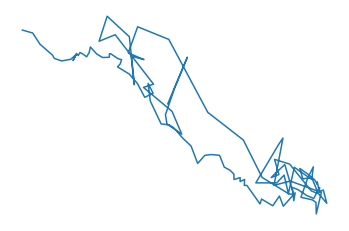

In [5]:
import matplotlib.pyplot as plt

plt.plot(track_zero.x,track_zero.y)
plt.axis('off')
plt.show()
# associate each cell with the stardist output frame
# * make a dataframe with cellID from btrack, cell#:frame from stardist (or ndimage.label)
# * generate TIFF slices for each cell over time
# * eventually, connect with ROI from MetaMorph .rgn file and Excel spreadsheet

In [33]:
import btrack
from skimage.io import imread, imsave
from skimage import exposure

import pandas as pd
import numpy as np
from tqdm import tqdm

img = exposure.adjust_gamma(imread('/home/cullen/nfs/gorbsky_data/input_data/jd734w1p1c1.tif'), 0.1)
segmentation = imread('/home/cullen/nfs/gorbsky_data/binary_data/stardist/no_morph/jd734W1P 1c1.tif')
# segmentation = imread('/gorbsky_data/binary_data/fiji_thresh/bin_jd734W1P 1c1.tif')
objects = btrack.utils.segmentation_to_objects(segmentation, properties=('area', ))
with btrack.BayesianTracker() as tracker:
    tracker.configure_from_file('/home/cullen/nfs/gorbsky_data/docker_PhaseOne/tracking/cell_config.json')
    #   tracker.configure_from_file('/gorbsky_data/tracking/cell_config.json')
    tracker.append(objects)
    tracker.volume=((0, 1200), (0, 1600), (-1e5, 1e5))
    tracker.track_interactive(step_size=100)
    tracker.optimize()
    tracker.export('/home/cullen/nfs/gorbsky_data/docker_PhaseOne/tracking/tracks.h5', obj_type='obj_type_1')
    #   tracker.export('/gorbsky_data/tracking/tracks.h5', obj_type='obj_type_1')
    tracks = tracker.tracks


s = 128
# for t in tqdm(tracks):
for t in tqdm([tracks[1]]):
    track_vid = np.zeros((s,s,len(t.x)))
    for i in range(len(t.x)):
        x = int(t.x[i])
        y = int(t.y[i])
        x_low = x - int(s/2)
        x_low_val = max(0, x_low)
        x_high = x + int(s/2)
        x_high_val = min(1608, x_high)
        y_low = y - int(s/2)
        y_low_val = max(0, y_low)
        y_high = y + int(s/2)
        y_high_val = min(1608, y_high)
        frame = img[i,y_low_val:y_high_val,x_low_val:x_high_val]
#         track_vid[-min(0, y_low):2*int(s/2)+1608-max(1608, y_high),
#                   -min(0, x_low):2*int(s/2)+1608-max(1608, x_high),i] = frame
        track_vid[:,:,i] = frame
    print(t.ID)
    imsave('/home/cullen/nfs/gorbsky_data/tracking_videos/jd734W1P 1c1_btrack'+str(t.ID)+'.tif', track_vid)


[INFO][2021/07/29 08:22:15 PM] Localizing objects from segmentation...


KeyboardInterrupt: 

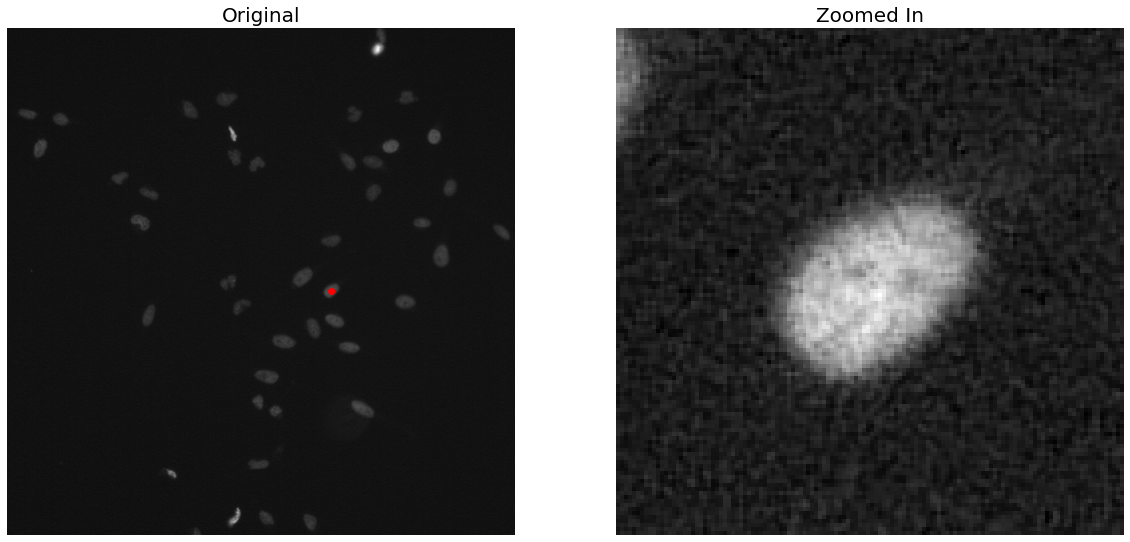

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

t = 1
f = 4
plt.subplot(121)
plt.imshow(img[f], cmap="gray")
plt.plot(tracks[t].x[f],tracks[1].y[f],'ro')
plt.axis('off')
plt.title("Original",fontsize=20,)

plt.subplot(122)
s = 128
left = int(tracks[t].x[f])-int(s/2)
right = int(tracks[t].x[f])+int(s/2)
low = int(tracks[t].y[f])-int(s/2)
high = int(tracks[t].y[f])+int(s/2)
plt.imshow(img[f,low:high,left:right],'gray')
plt.axis('off')
plt.title("Zoomed In",fontsize=20)

plt.show()
# plt.imshow(segmentation[0,(int(tracks[0].x[0])-64):(int(tracks[0].x[0])+64),(1608-(int(tracks[0].y[0])-64)):(1608-(int(tracks[0].y[0])+64))],cmap='prism')


In [ ]:
# import napari

# viewer = napari.Viewer()
# viewer.add_labels(segmentation)
# viewer.add_tracks(data, properties=properties, graph=graph)

In [25]:
track25 = imread('/home/cullen/nfs/gorbsky_data/tracking_videos/jd734W1P 1c1_btrack25.tif')

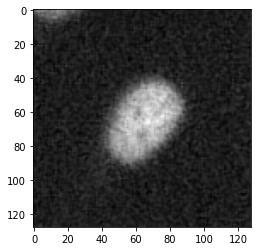

In [35]:
plt.imshow(np.swapaxes(track25,0,2)[4],'gray')

In [ ]:
tracks[t].ID

In [36]:
imsave('/home/cullen/example.tif',np.swapaxes(track25,0,2))

In [44]:
import skvideo.io

In [90]:
skvideo.io.vwrite("/home/cullen/video.mp4", np.around(255*np.divide(np.swapaxes(track25,0,2).reshape(-1,128,128,1),np.max(track25)),0).astype(np.uint8))

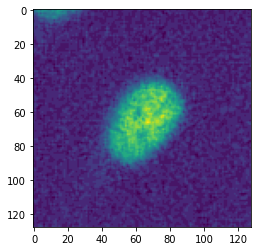

In [89]:
plt.imshow(np.around(255*np.divide(np.swapaxes(track25,0,2).reshape(-1,128,128,1),np.max(track25)),0).astype(np.uint8)[4])

In [88]:
np.around(255*np.divide(np.swapaxes(track25,0,2).reshape(-1,128,128,1),np.max(track25)),0).astype(np.uint8)[4]

array([[[219],
        [220],
        [221],
        ...,
        [215],
        [214],
        [214]],

       [[219],
        [220],
        [221],
        ...,
        [215],
        [215],
        [215]],

       [[218],
        [218],
        [218],
        ...,
        [215],
        [214],
        [215]],

       ...,

       [[214],
        [215],
        [214],
        ...,
        [215],
        [215],
        [216]],

       [[214],
        [215],
        [215],
        ...,
        [215],
        [216],
        [216]],

       [[215],
        [215],
        [215],
        ...,
        [215],
        [215],
        [215]]], dtype=uint8)